# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key = '4c0f98dbc440d91fd4b81478fb11d173'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


# set up lists to hold reponse info
Found_City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

print('Beginning Data Retrieval')
print('-------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        Found_City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'processing record {cities.index(city)} | {city}')
    except:
        print(f'Found an error with {city}')




Beginning Data Retrieval
-------------------------
processing record 0 | busselton
processing record 1 | ilulissat
processing record 2 | punta arenas
processing record 3 | trincomalee
processing record 4 | verkhnevilyuysk
processing record 5 | ponta do sol
processing record 6 | massena
processing record 7 | dunedin
processing record 8 | ushuaia
processing record 9 | salalah
processing record 10 | sinnamary
processing record 11 | port lincoln
processing record 12 | rikitea
processing record 13 | bluff
processing record 14 | vaini
processing record 15 | meulaboh
processing record 16 | mont-dore
processing record 17 | dolores
processing record 18 | nipawin
processing record 19 | esperance
processing record 20 | barrow
processing record 21 | matara
processing record 22 | turukhansk
processing record 23 | saint anthony
Found an error with taolanaro
processing record 25 | puerto ayora
processing record 26 | itoman
processing record 27 | moose factory
processing record 28 | sol-iletsk
process

processing record 248 | maraba
processing record 249 | shenjiamen
processing record 250 | hasaki
processing record 251 | nouna
processing record 252 | springfield
processing record 253 | riyadh
processing record 254 | lasa
processing record 255 | provideniya
Found an error with vitimskiy
processing record 257 | bubaque
processing record 258 | revelstoke
processing record 259 | lagoa
processing record 260 | la paz
processing record 261 | saint-pierre
processing record 262 | venancio aires
processing record 263 | winslow
processing record 264 | flin flon
processing record 265 | westerland
processing record 266 | port hedland
processing record 267 | kahului
processing record 268 | altamira
processing record 269 | antsohihy
processing record 270 | keita
processing record 271 | pujehun
processing record 272 | coquimbo
processing record 273 | saint andrews
processing record 274 | centralia
processing record 275 | hede
processing record 276 | broome
processing record 277 | victoria
processing

processing record 498 | waipawa
processing record 499 | alice springs
processing record 500 | tiznit
processing record 501 | bosaso
Found an error with sitio novo do tocantins
processing record 503 | wuwei
processing record 504 | morehead
processing record 505 | gao
processing record 506 | krasnoye
processing record 507 | olkhovka
processing record 508 | bronnoysund
Found an error with cumaribo
processing record 510 | sola
processing record 511 | nome
processing record 512 | boende
processing record 513 | sorland
processing record 514 | kutum
processing record 515 | tommot
Found an error with acarau
processing record 517 | kimbe
processing record 518 | san lawrenz
processing record 519 | caravelas
Found an error with olafsvik
Found an error with alotau
processing record 522 | samarai
processing record 523 | roquetas de mar
processing record 524 | alcudia
processing record 525 | sijunjung
processing record 526 | margate
processing record 527 | camabatela
processing record 528 | piracanj

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather_dict = {
    "City": Found_City,
    "Cloudiness": Cloudiness,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng":Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv('Weather_Data.csv')

In [20]:
weather_data.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,0,1553666120,22,-33.64,115.35,27.78,7.38
1,Ilulissat,68,1553662200,77,69.22,-51.10,-17.00,2.10
2,Punta Arenas,40,1553665945,57,-53.16,-70.91,11.00,11.30
3,Trincomalee,0,1553666242,52,8.58,81.23,33.51,3.23
4,Verkhnevilyuysk,0,1553666242,58,63.45,120.31,-6.99,2.63


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

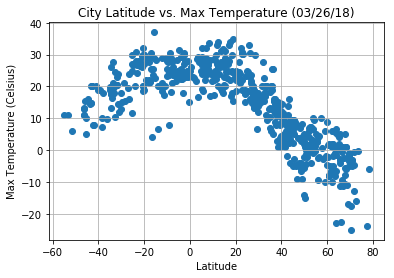

In [21]:
 # Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/26/18)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

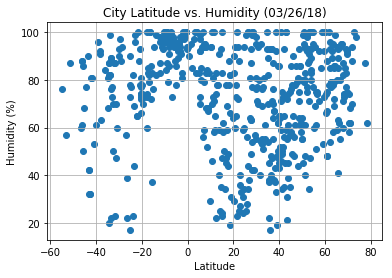

In [22]:
 # Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/26/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

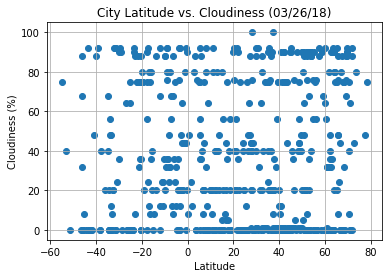

In [23]:
 # Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/26/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

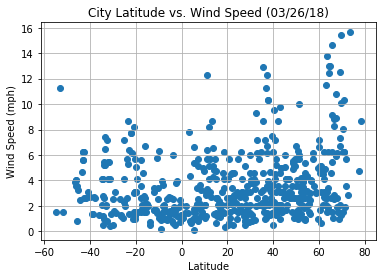

In [25]:
 # Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/26/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsWindspeed.png")

# Show plot
plt.show()

In [ ]:
###Observable Trends

1. Warmer near equator.  Southern Hemisphere appears to be warmer.
2. Humidity is high and less variable near the Equator
3. High latitude in Northern Hemisphere appear to have strongest winds.